# EDA of Sick and Well Visits by Insurance (April 2021-April 2022)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Raw Data 

In [4]:
df_wells = pd.read_csv("Ins_wells.csv")
df_sicks = pd.read_csv("Ins_sicks.csv")

In [3]:
df_wells

,Patient_id,Date,CPT,Units,Charge_Resp,Charge,Contractual_Adj,Insurance
0,72974,4/1/2021,99391,1,P,125,-28.41,Absolute Total Care Medicaid
1,73076,4/2/2021,92552,1,P,28,-1.33,Absolute Total Care Medicaid
2,73076,4/2/2021,99383,1,P,161,-44.10,Absolute Total Care Medicaid
3,72485,4/7/2021,99392,1,P,130,-26.84,Absolute Total Care Medicaid
4,72630,4/8/2021,99392,1,P,130,-26.84,Absolute Total Care Medicaid
...,...,...,...,...,...,...,...,...
3849,72879,3/22/2022,99392,1,P,155,-52.48,United Healthcare
3850,66218,3/22/2022,99393,1,P,160,-57.80,United Healthcare
3851,73729,3/28/2022,99391,1,P,145,-49.00,United Healthcare
3852,71591,8/23/2021,99392,1,P,155,0.00,Valenz Tucker McClancy


In [4]:
df_sicks

,Patient_id,Date,CPT,Units,Charge_Resp,Charge,Contractual_Adj,Insurance
0,72241,4/1/2021,99212,1,P,80.0,-36.99,Absolute Total Care Medicaid
1,72307,4/9/2021,99213,1,P,120.0,-48.70,Absolute Total Care Medicaid
2,72458,4/9/2021,99213,1,P,120.0,-48.70,Absolute Total Care Medicaid
3,73097,4/10/2021,99213,1,P,120.0,-48.70,Absolute Total Care Medicaid
4,73157,4/13/2021,99203,1,P,165.0,-61.42,Absolute Total Care Medicaid
...,...,...,...,...,...,...,...,...
4770,54042,3/15/2022,99213,1,P,135.0,-64.14,United Healthcare
4771,67445,3/17/2022,99212,1,P,90.0,-68.62,United Healthcare
4772,72135,3/23/2022,99213,1,P,135.0,-64.14,United Healthcare
4773,64370,3/28/2022,99213,1,P,135.0,-64.14,United Healthcare


In [5]:
df_wells.dtypes

Patient_id           int64
Date                object
CPT                 object
Units                int64
Charge_Resp         object
Charge               int64
Contractual_Adj    float64
Insurance           object
dtype: object

# Aggregated Analysis

In [6]:
# Create an aggregated total of charges, contractual adjustments, and visit counts by insurance
price_df_wells = df_wells[['Charge','Contractual_Adj', 'Insurance']].groupby("Insurance").sum()
price_df_wells['Counts'] = df_wells.value_counts().groupby("Insurance").sum()
price_df_wells.index.values
price_df_wells['Ins_abb'] = ['ATCM', 'Ae', 'AS', 'AvC', 'Am', 'BCBS-P', 'BCBS-F', 'BCBS-NC', 'BCBS-SC', 'BCCP', 'Ci','CiPPO', 'CBS', 'CBSI',
      'FCM', 'GEHA', 'GR', 'HBM', 'H', 'HHH', 'KBA', 'L', 'M', 'MS', 'MSC', 'MHA', 'MHM', 'NGAH', 'NoIns', 'PAI', 'PHCS',
      'PALI', 'RNI', 'SHS', 'TSR', 'TH', 'TSB', 'UMR', 'UH', 'VTM']

price_df_sicks = df_sicks[['Charge', 'Contractual_Adj', 'Insurance']].groupby("Insurance").sum()
price_df_sicks['Counts'] = df_sicks.value_counts().groupby("Insurance").sum()
price_df_sicks.index.values
price_df_sicks['Ins_abb'] = ['ATCM', 'Ae', 'AS', 'AvC', 'ABS', 'Am', 'BCBS-P', 'BCBS-F', 'BCBS-NC', 'BCBS-SC', 'BCCP', 'Ci','CiPPO', 'CBS', 'CBSI',
      'EH', 'FCM', 'GEHA', 'GR', 'HPI', 'HBM', 'H', 'HHH', 'LH', 'L', 'M', 'MS', 'MSC', 'MHA', 'MHM', 'NGAH', 'NoIns', 'OHP', 'PHCS',
      'PALI', 'TSR', 'TH', 'TSB', 'UMR', 'UH']

In [7]:
price_df_wells['Percent_Lost'] = -100*(price_df_wells['Contractual_Adj'] / price_df_wells['Charge'])

price_df_sicks['Percent_Lost'] = -100*(price_df_sicks['Contractual_Adj'] / price_df_sicks['Charge'])

In [8]:
price_df_wells

,Charge,Contractual_Adj,Counts,Ins_abb,Percent_Lost
Insurance,,,,,
Absolute Total Care Medicaid,23435,-7224.62,182,ATCM,30.828334
Aetna,9561,-3162.43,74,Ae,33.076352
All Savers,493,-157.28,4,AS,31.902637
Allegiance via Cigna,160,-90.00,1,AvC,56.250000
Ambetter,471,-145.00,3,Am,30.785563
BCBS - PPO Plans,108017,-46021.56,808,BCBS-P,42.605849
BCBS Federal Employee Program,2908,-1274.00,21,BCBS-F,43.810179
BCBS NC SHP,130,-44.00,1,BCBS-NC,33.846154
BCBS SC SHP,64419,-22906.61,484,BCBS-SC,35.558779


## Visualization of Well Visit Counts by Insurance

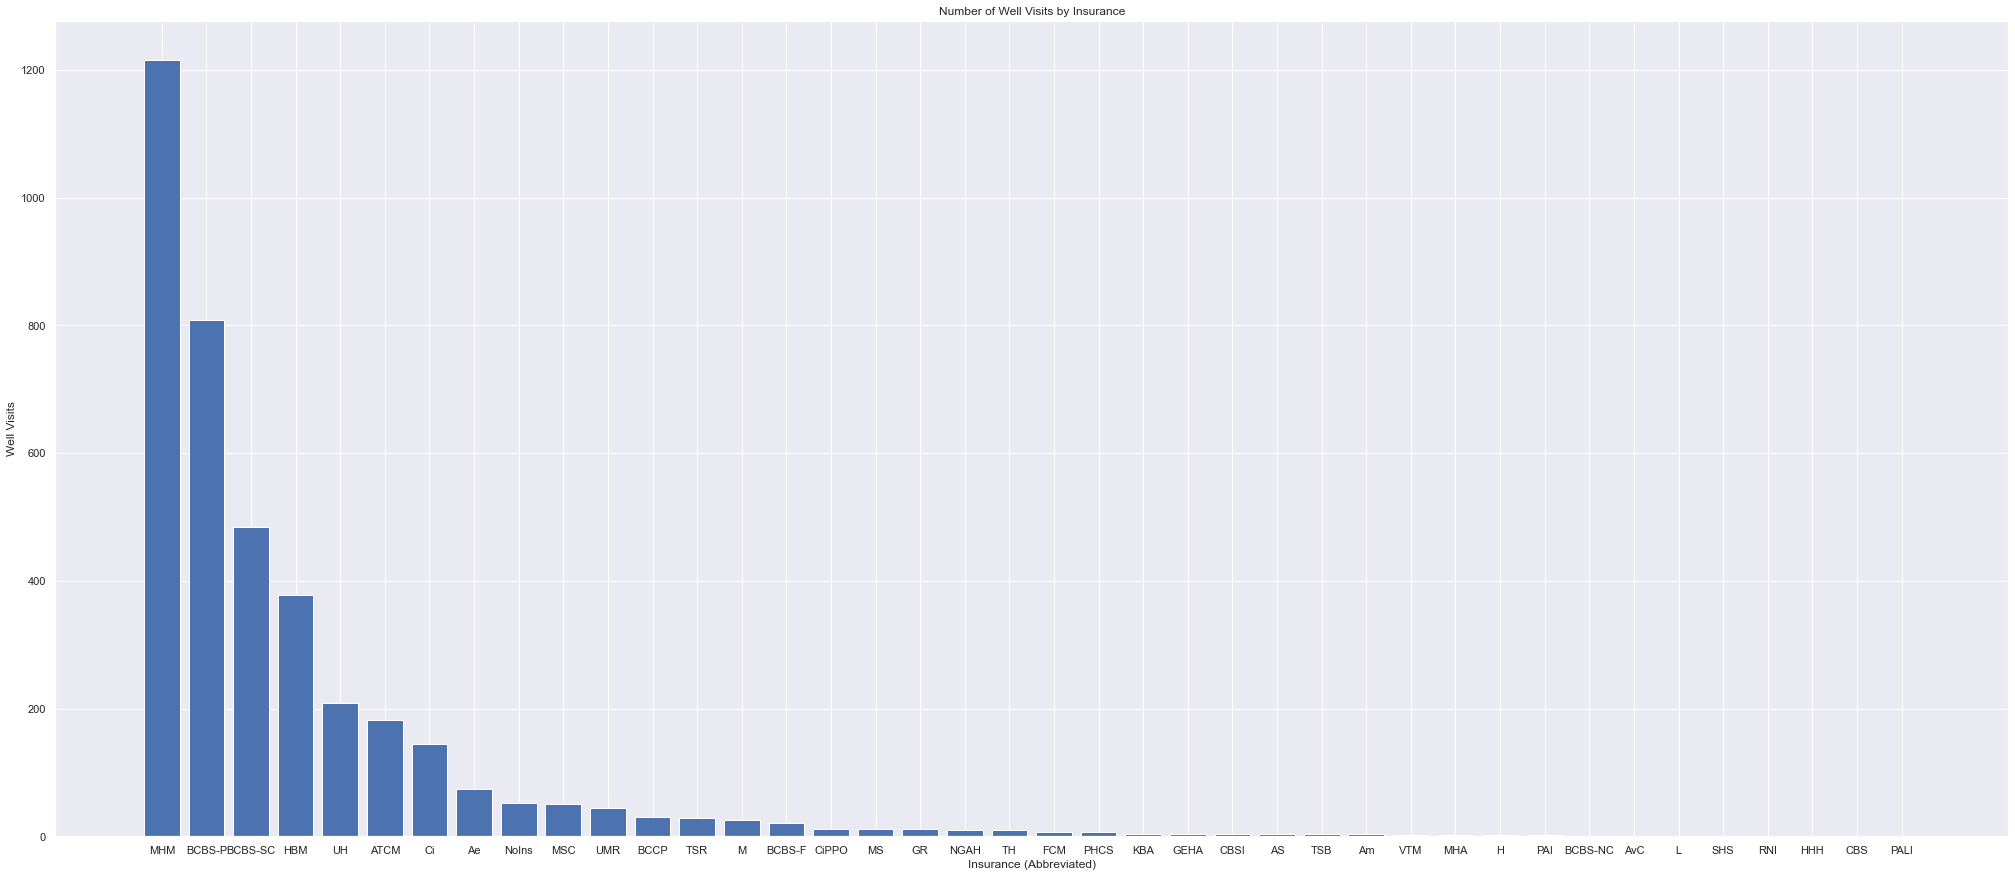

In [9]:
Insurance_abbs = price_df_wells.sort_values(by=['Counts'], ascending=False)['Ins_abb']
Counts = price_df_wells.sort_values(by=['Counts'], ascending=False)['Counts']
fig = plt.figure(figsize=(35,15))
plt.xlabel("Insurance (Abbreviated)")
plt.ylabel("Well Visits")
plt.title("Number of Well Visits by Insurance")
bar = plt.bar(Insurance_abbs, Counts)


### Insurances with greater than 20 recorded well visits

In [10]:
# aggregated totals by insurance, discarding ones with visit counts <= 20, and sorted by greatest to least visit count
wells_most_visits = price_df_wells[price_df_wells['Counts'] > 20].sort_values(
    by=['Counts'], ascending=False
    )
wells_most_visits

,Charge,Contractual_Adj,Counts,Ins_abb,Percent_Lost
Insurance,,,,,
Molina Healthcare Medicaid,145344,-36747.14,1216,MHM,25.282874
BCBS - PPO Plans,108017,-46021.56,808,BCBS-P,42.605849
BCBS SC SHP,64419,-22906.61,484,BCBS-SC,35.558779
Healthy Blue Medicaid,47880,-14790.53,377,HBM,30.890831
United Healthcare,26923,-8725.78,209,UH,32.410133
Absolute Total Care Medicaid,23435,-7224.62,182,ATCM,30.828334
Cigna,19467,-10042.33,145,Ci,51.586428
Aetna,9561,-3162.43,74,Ae,33.076352
No Primary Insurance Plan,6851,0.00,52,NoIns,-0.000000


## Visualization of Sick Visit Counts by Insurance

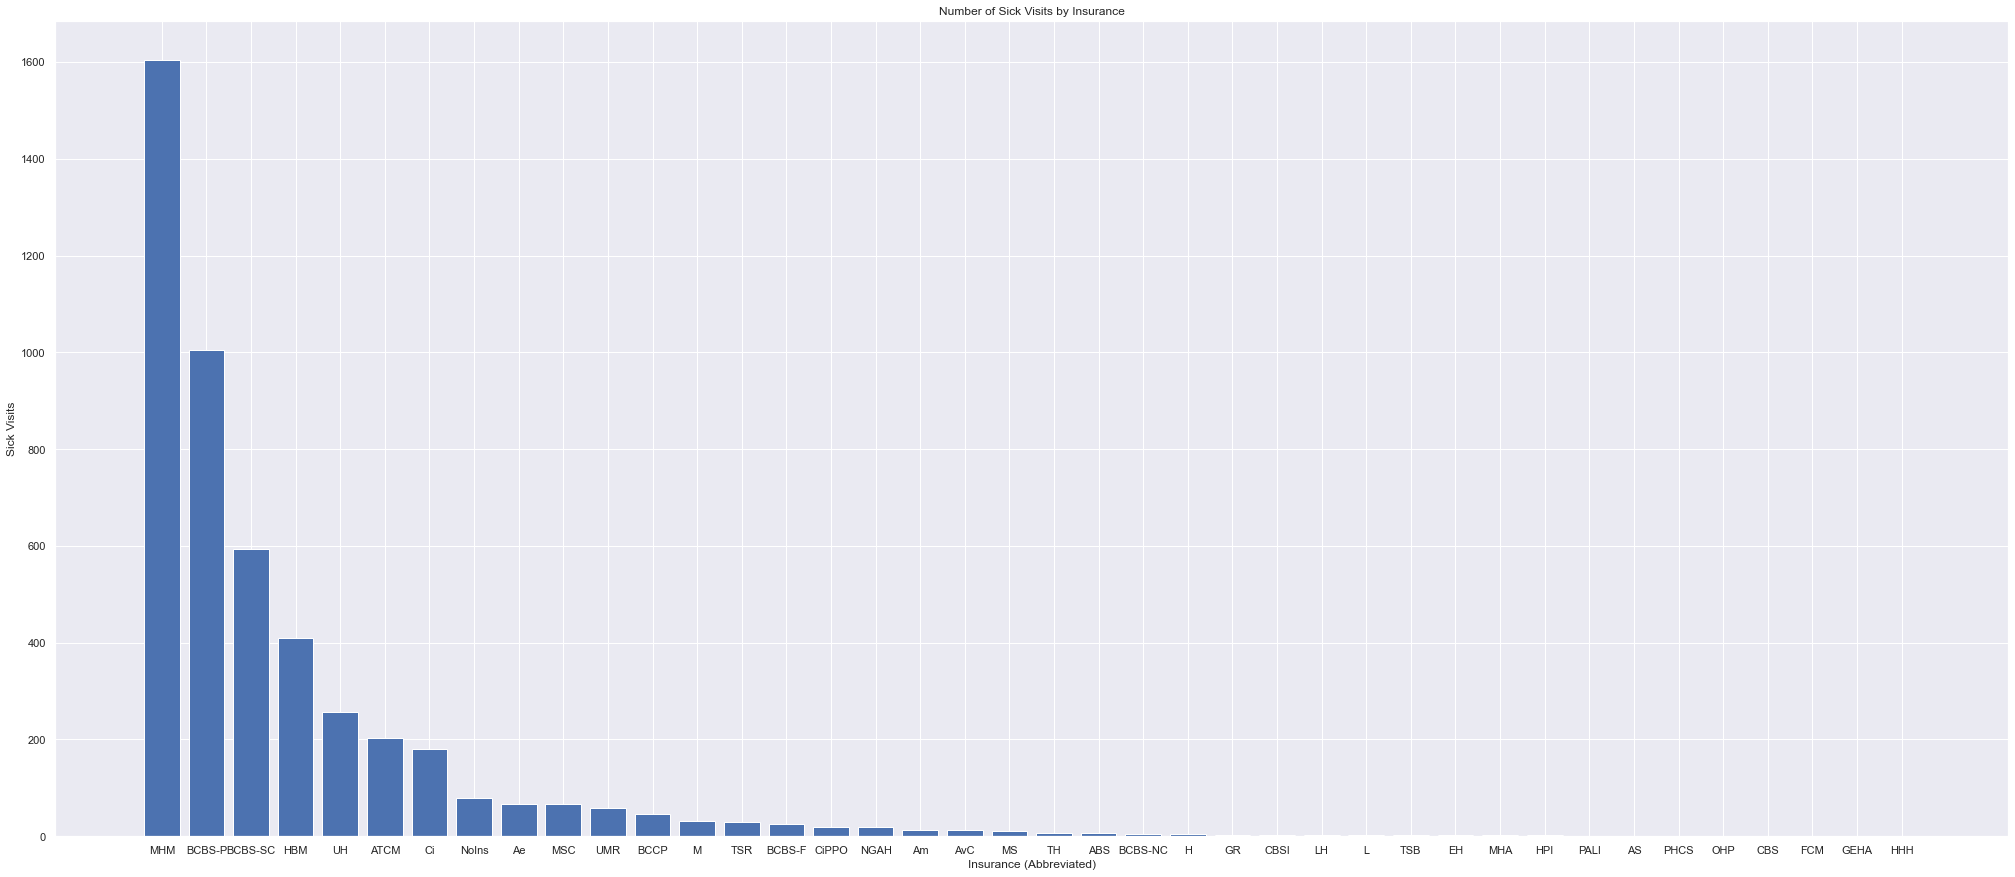

In [11]:
Insurance_abbs = price_df_sicks.sort_values(by=['Counts'], ascending=False)['Ins_abb']
Counts = price_df_sicks.sort_values(by=['Counts'], ascending=False)['Counts']
fig = plt.figure(figsize=(35,15))
plt.xlabel("Insurance (Abbreviated)")
plt.ylabel("Sick Visits")
plt.title("Number of Sick Visits by Insurance")
bar = plt.bar(Insurance_abbs, Counts)

### Insurances with greater than 10 recorded sick visits

In [12]:
# aggregated totals by insurance, discarding ones with visit counts <= 10, and sorted by greatest to least visit count
sicks_most_visits = price_df_sicks[price_df_sicks['Counts'] > 10].sort_values(
    by=['Counts'], ascending=False
    )
sicks_most_visits

,Charge,Contractual_Adj,Counts,Ins_abb,Percent_Lost
Insurance,,,,,
Molina Healthcare Medicaid,198870.5,-85490.81,1605,MHM,42.988181
BCBS - PPO Plans,125274.0,-55473.14,1006,BCBS-P,44.281447
BCBS SC SHP,75974.5,-30329.05,593,BCBS-SC,39.920039
Healthy Blue Medicaid,49885.0,-21681.81,409,HBM,43.463586
United Healthcare,32264.0,-13807.79,256,UH,42.796274
Absolute Total Care Medicaid,26118.0,-12179.95,203,ATCM,46.634314
Cigna,22162.0,-12021.73,180,Ci,54.244788
No Primary Insurance Plan,8098.0,0.00,79,NoIns,-0.000000
Aetna,8929.5,-4226.75,67,Ae,47.334677


## Percent of Well Visit Revenue Lost per Insurance

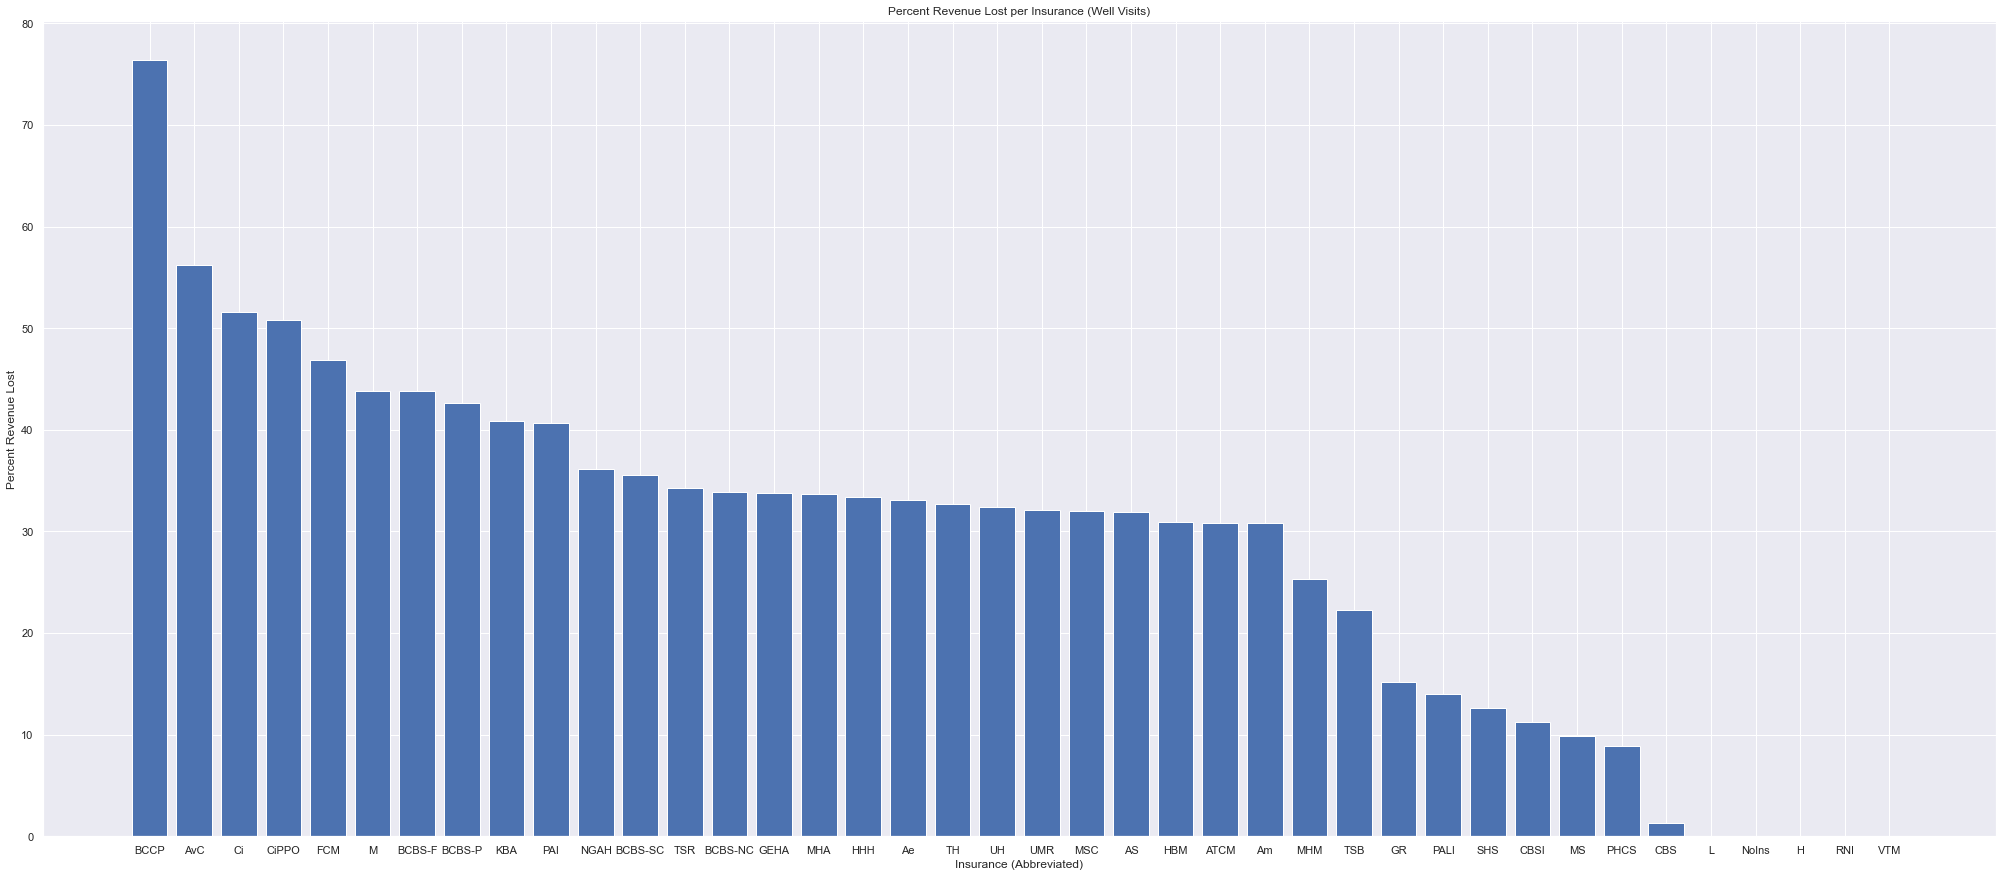

In [13]:
Insurance_abbs = price_df_wells.sort_values(by=['Percent_Lost'], ascending=False)['Ins_abb']
Perc = price_df_wells.sort_values(by=['Percent_Lost'], ascending=False)['Percent_Lost']
fig = plt.figure(figsize=(35,15))
plt.xlabel("Insurance (Abbreviated)")
plt.ylabel("Percent Revenue Lost")
plt.title("Percent Revenue Lost per Insurance (Well Visits)")
bar = plt.bar(Insurance_abbs, Perc)

## Percent of Sick Visit Revenue Lost per Insurance

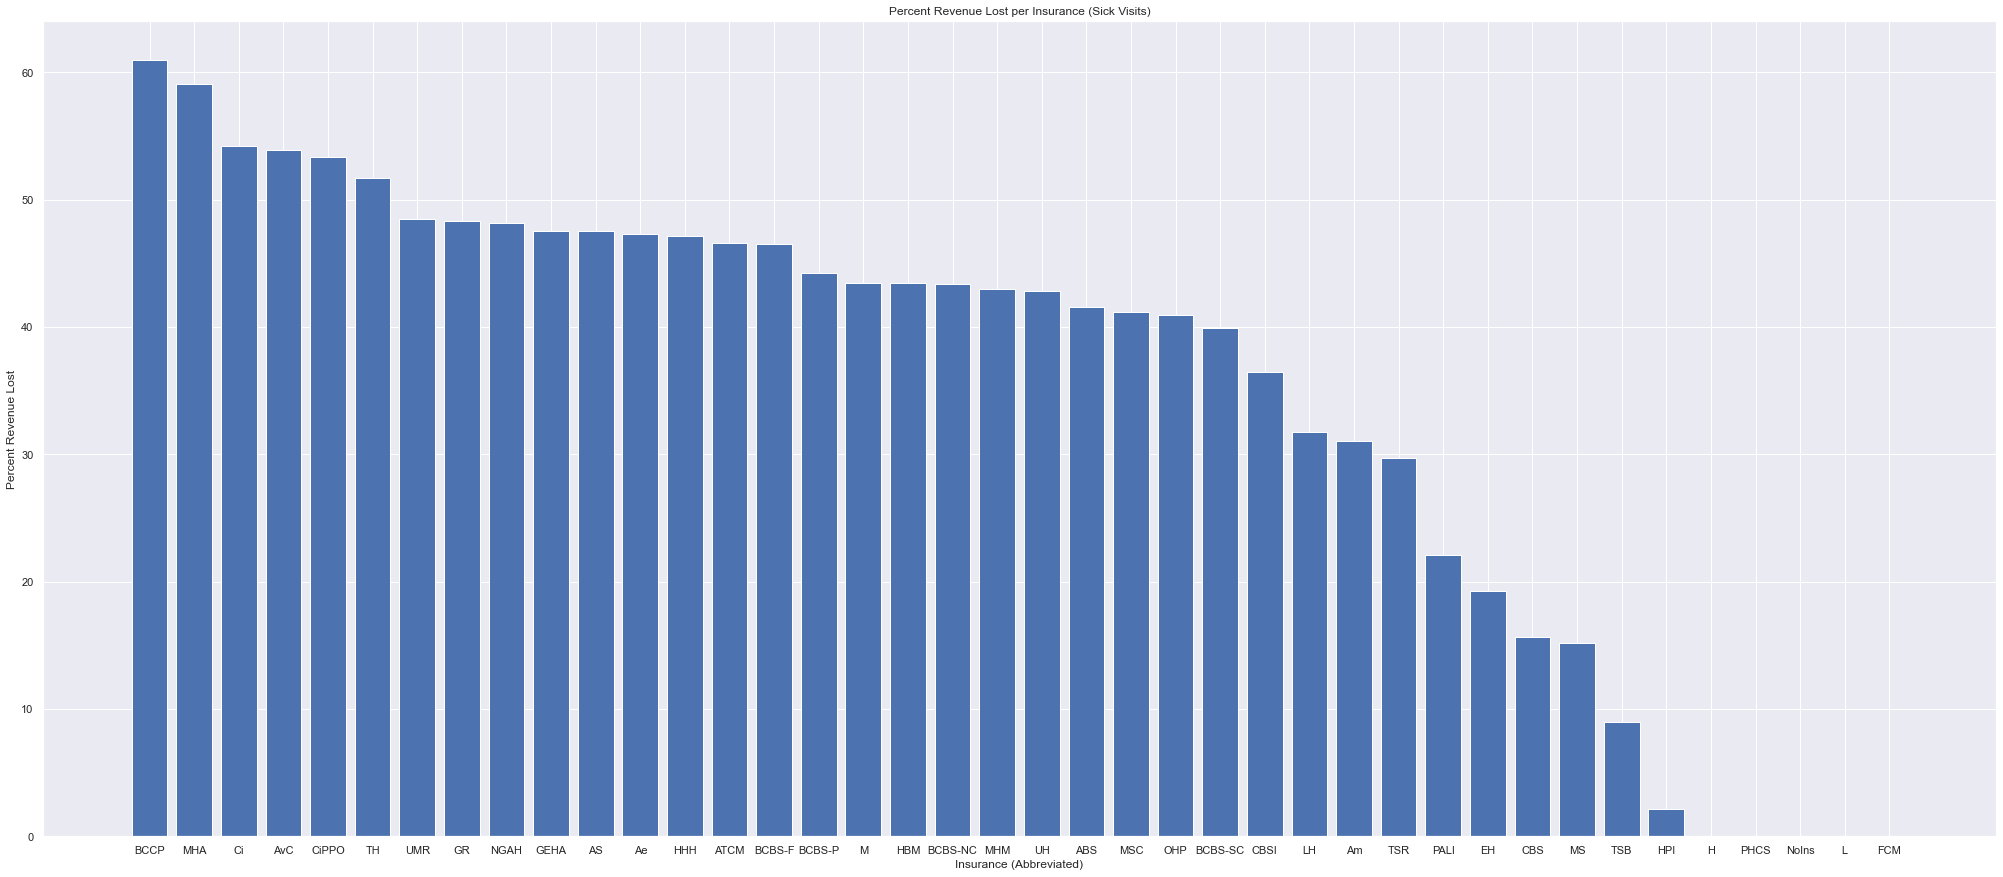

In [14]:
Insurance_abbs = price_df_sicks.sort_values(by=['Percent_Lost'], ascending=False)['Ins_abb']
Perc = price_df_sicks.sort_values(by=['Percent_Lost'], ascending=False)['Percent_Lost']
fig = plt.figure(figsize=(35,15))
plt.xlabel("Insurance (Abbreviated)")
plt.ylabel("Percent Revenue Lost")
plt.title("Percent Revenue Lost per Insurance (Sick Visits)")
bar = plt.bar(Insurance_abbs, Perc)

## Total Well Visit Revenue Lost per Insurance

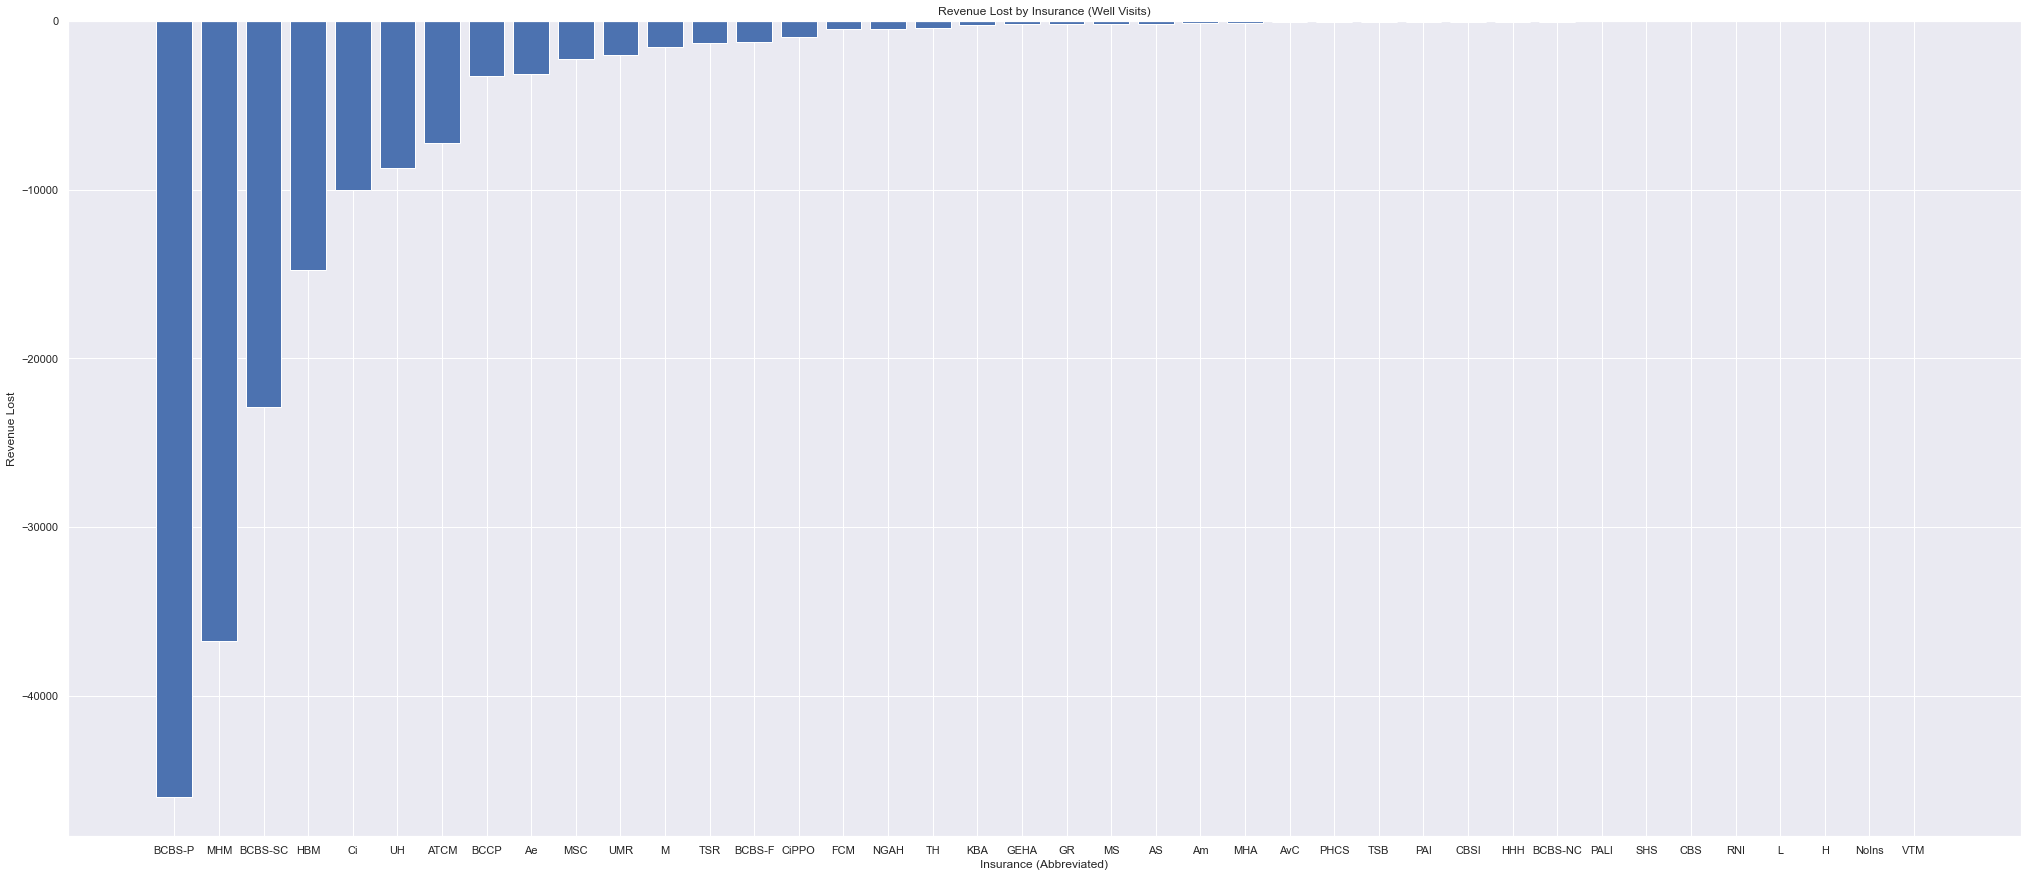

In [15]:
Insurance_abbs = price_df_wells.sort_values(by=['Contractual_Adj'], ascending=True)['Ins_abb']
Counts = price_df_wells.sort_values(by=['Contractual_Adj'], ascending=True)['Contractual_Adj']
fig = plt.figure(figsize=(35,15))
plt.xlabel("Insurance (Abbreviated)")
plt.ylabel("Revenue Lost")
plt.title("Revenue Lost by Insurance (Well Visits)")
bar = plt.bar(Insurance_abbs, Counts)

### Insurances with more than \\$2000 in Lost Well Visit Revenue

In [16]:
# aggregated totals by insurance, discarding ones with lost revenue <= $2000, 
# and sorted by greatest to least revenue lost 
wells_most_rev_lost = price_df_wells[abs(price_df_wells['Contractual_Adj']) > 2000].sort_values(
    by=['Contractual_Adj'], ascending=True
    )
wells_most_rev_lost

,Charge,Contractual_Adj,Counts,Ins_abb,Percent_Lost
Insurance,,,,,
BCBS - PPO Plans,108017,-46021.56,808,BCBS-P,42.605849
Molina Healthcare Medicaid,145344,-36747.14,1216,MHM,25.282874
BCBS SC SHP,64419,-22906.61,484,BCBS-SC,35.558779
Healthy Blue Medicaid,47880,-14790.53,377,HBM,30.890831
Cigna,19467,-10042.33,145,Ci,51.586428
United Healthcare,26923,-8725.78,209,UH,32.410133
Absolute Total Care Medicaid,23435,-7224.62,182,ATCM,30.828334
BlueChoice Commercial Plan,4307,-3292.00,30,BCCP,76.433713
Aetna,9561,-3162.43,74,Ae,33.076352


## Total Sick Revenue Lost per Insurance

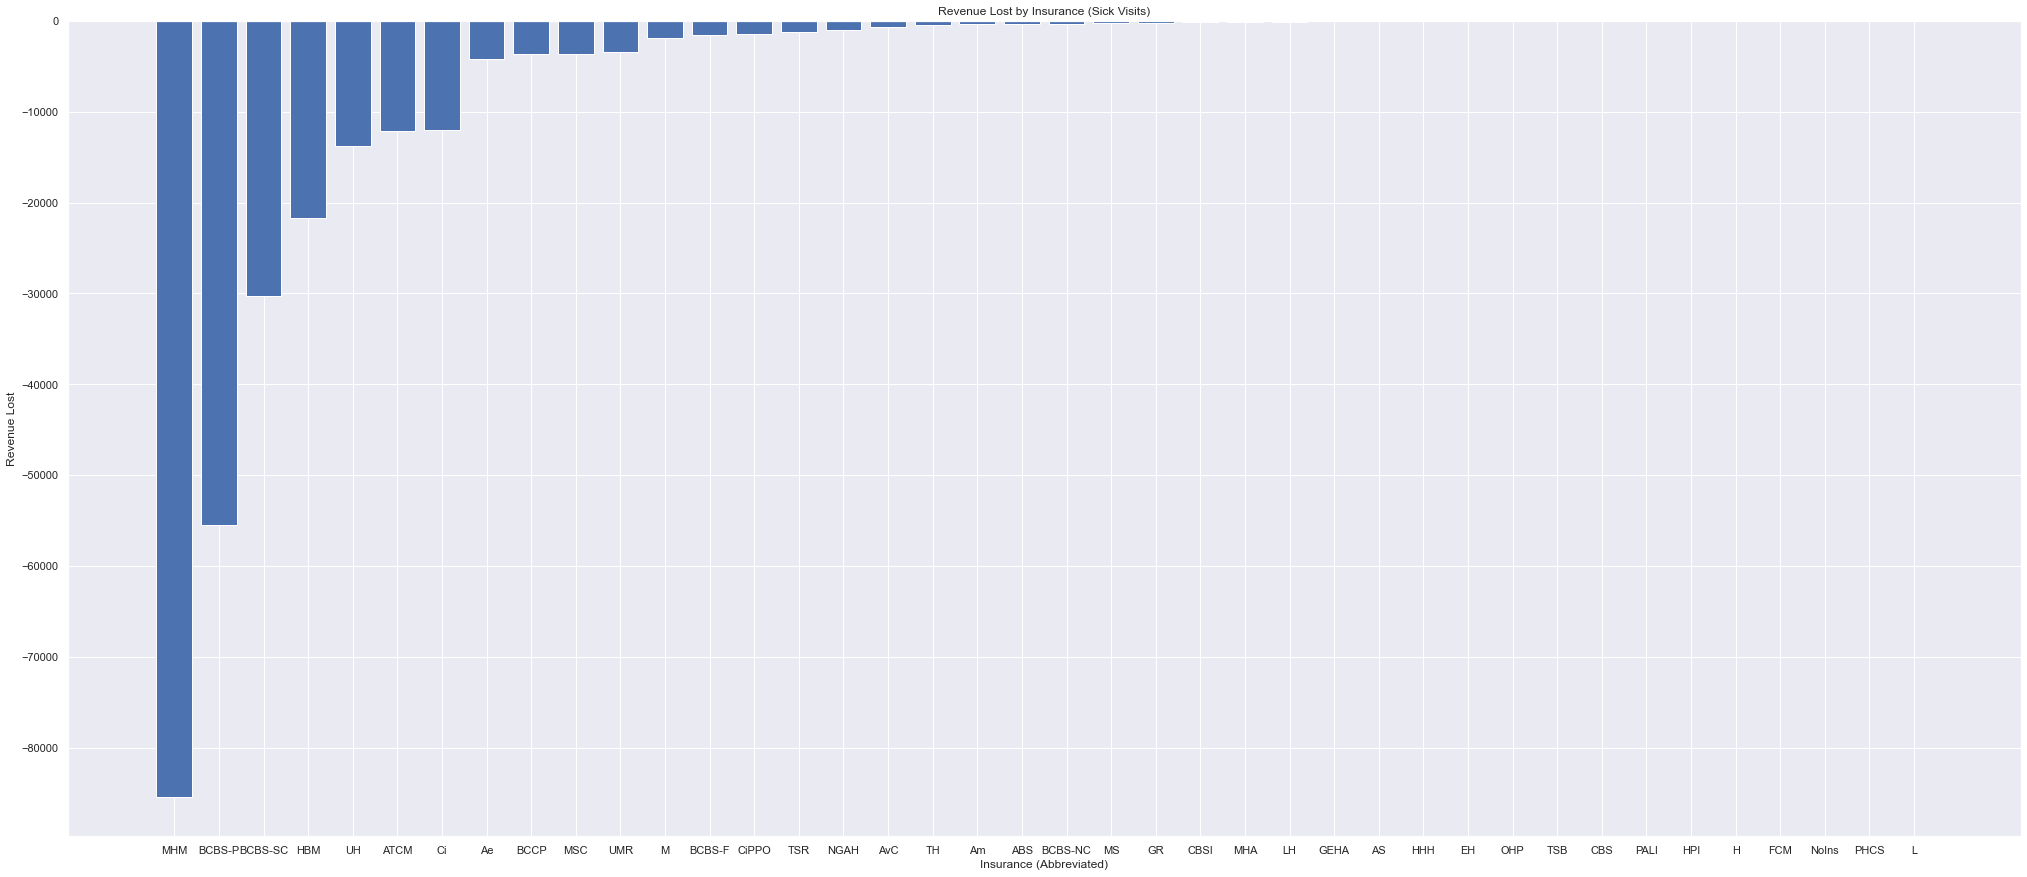

In [17]:
Insurance_abbs = price_df_sicks.sort_values(by=['Contractual_Adj'], ascending=True)['Ins_abb']
Counts = price_df_sicks.sort_values(by=['Contractual_Adj'], ascending=True)['Contractual_Adj']
fig = plt.figure(figsize=(35,15))
plt.xlabel("Insurance (Abbreviated)")
plt.ylabel("Revenue Lost")
plt.title("Revenue Lost by Insurance (Sick Visits)")
bar = plt.bar(Insurance_abbs, Counts)

### Insurances with more than \\$2000 in Lost Sick Visit Revenue

In [18]:
# aggregated totals by insurance, discarding ones with lost revenue <= $2000, 
# and sorted by greatest to least revenue lost 
sicks_most_rev_lost = price_df_sicks[abs(price_df_sicks['Contractual_Adj']) > 2000].sort_values(
    by=['Contractual_Adj'], ascending=True
    )
sicks_most_rev_lost

,Charge,Contractual_Adj,Counts,Ins_abb,Percent_Lost
Insurance,,,,,
Molina Healthcare Medicaid,198870.5,-85490.81,1605,MHM,42.988181
BCBS - PPO Plans,125274.0,-55473.14,1006,BCBS-P,44.281447
BCBS SC SHP,75974.5,-30329.05,593,BCBS-SC,39.920039
Healthy Blue Medicaid,49885.0,-21681.81,409,HBM,43.463586
United Healthcare,32264.0,-13807.79,256,UH,42.796274
Absolute Total Care Medicaid,26118.0,-12179.95,203,ATCM,46.634314
Cigna,22162.0,-12021.73,180,Ci,54.244788
Aetna,8929.5,-4226.75,67,Ae,47.334677
BlueChoice Commercial Plan,6021.0,-3673.00,46,BCCP,61.003156


# Analysis by Date

In [24]:
# convert date columns to usable datetime objects
df_wells['Date'] = pd.to_datetime(df_wells['Date'])
df_sicks['Date'] = pd.to_datetime(df_sicks['Date'])

## Well Visits by Date

In [100]:
# streamline visualization by only displaying insurances with visit counts > 12 in the total yearlong period
data = df_wells.groupby('Insurance').filter(lambda x: len(x)>12)
data.value_counts().groupby('Insurance').sum()

Insurance
Absolute Total Care Medicaid      182
Aetna                              74
BCBS - PPO Plans                  808
BCBS Federal Employee Program      21
BCBS SC SHP                       484
BlueChoice Commercial Plan         30
Cigna                             145
Healthy Blue Medicaid             377
Medcost                            26
Medicaid of SC                     51
Molina Healthcare Medicaid       1216
No Primary Insurance Plan          52
Tricare SOUTH Region               28
UMR                                45
United Healthcare                 209
dtype: int64

<AxesSubplot:title={'center':'Weekly Well Visits by 15 Largest Insurances'}, xlabel='Date', ylabel='Visit Count'>

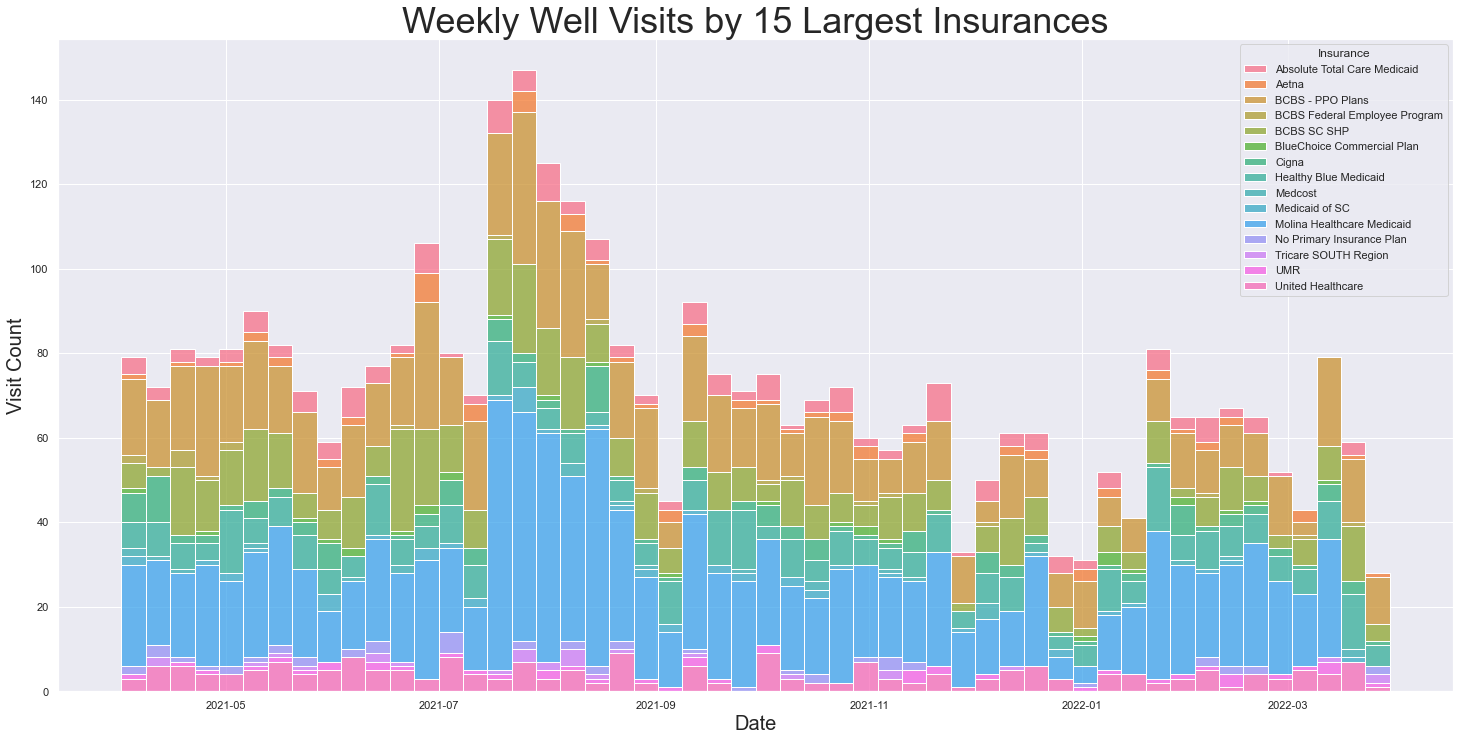

In [99]:
fig = plt.figure(figsize=(25,12))
plt.title("Weekly Well Visits by 15 Largest Insurances", fontsize=36)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Visit Count", fontsize=20)
custom_palette = sns.color_palette("Paired", 40)
sns.histplot(x=data['Date'], hue=data['Insurance'], stat='count',
             bins=52, multiple='stack')

## Sick Visits by Date

In [103]:
# streamline visualization by only displaying insurances with visit counts > 12 in the total yearlong period
data_sick = df_sicks.groupby('Insurance').filter(lambda x: len(x)>12)
data_sick.value_counts().groupby('Insurance').sum()

Insurance
Absolute Total Care Medicaid      203
Aetna                              67
BCBS - PPO Plans                 1006
BCBS Federal Employee Program      25
BCBS SC SHP                       593
BlueChoice Commercial Plan         46
Cigna                             180
Cigna PPO via Healthgram           19
Healthy Blue Medicaid             409
Medcost                            31
Medicaid of SC                     66
Molina Healthcare Medicaid       1605
National Gen Accident-Health       19
No Primary Insurance Plan          79
Tricare SOUTH Region               30
UMR                                59
United Healthcare                 256
dtype: int64

<AxesSubplot:title={'center':'Weekly Sick Visits by 16 Largest Insurances'}, xlabel='Date', ylabel='Visit Count'>

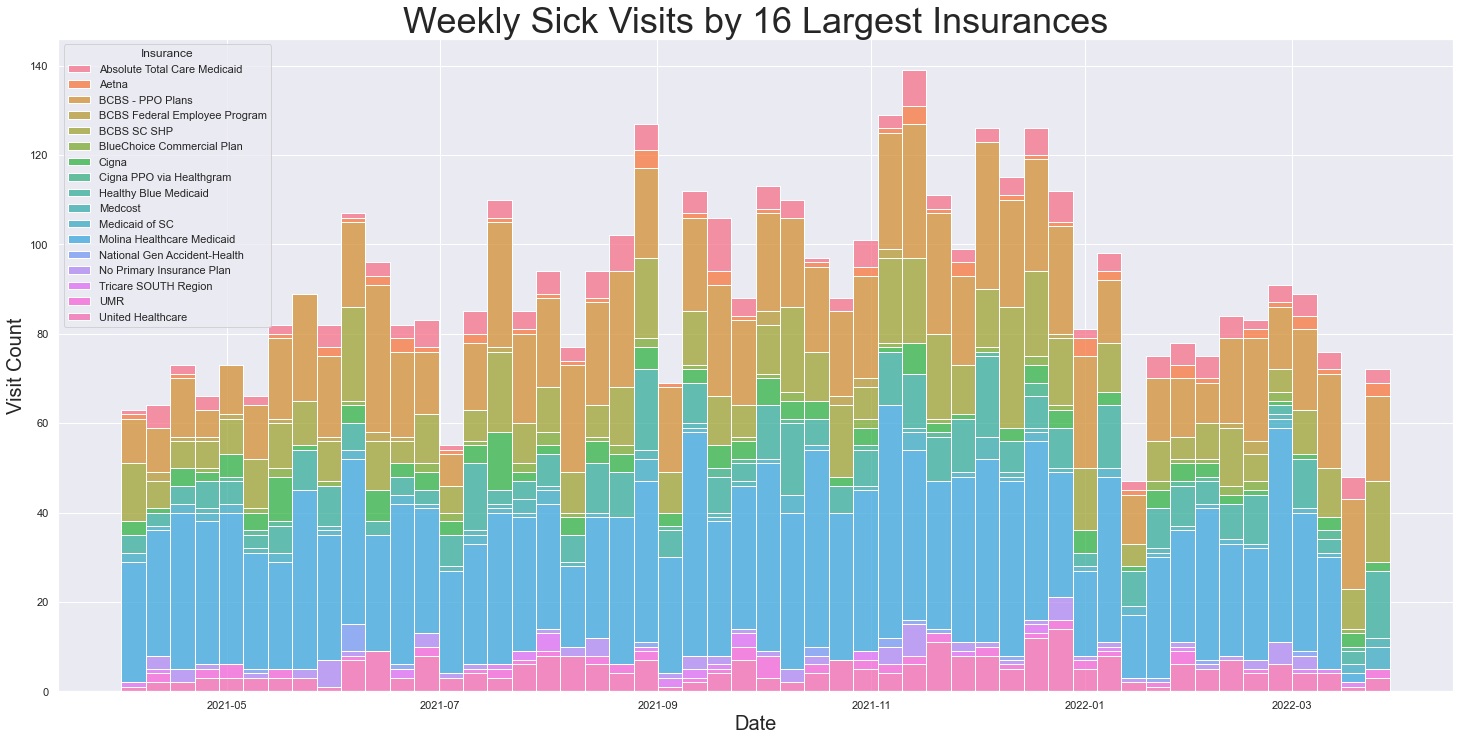

In [104]:
fig = plt.figure(figsize=(25,12))
plt.title("Weekly Sick Visits by 16 Largest Insurances", fontsize=36)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Visit Count", fontsize=20)
custom_palette = sns.color_palette("Paired", 40)
sns.histplot(x=data_sick['Date'], hue=data_sick['Insurance'], stat='count',
             bins=52, multiple='stack')

# Visit Count Analysis by Patient for Wells and Sicks

In [12]:
pt_data_well = df_wells.groupby(['Patient_id','Insurance']).sum()
pt_data_well['CPT_Counts'] = df_wells.value_counts().groupby('Patient_id').sum()
pt_data_well = pt_data_well.sort_values(by=['Charge'], ascending=False)

In [13]:
pt_data_well

,,Units,Charge,Contractual_Adj,CPT_Counts
Patient_id,Insurance,,,,
73091,Molina Healthcare Medicaid,8,1000,-338.89,NaN
73106,BCBS - PPO Plans,7,991,-431.00,NaN
73109,BCBS - PPO Plans,7,991,-431.00,NaN
73332,Aetna,6,886,-321.97,NaN
73318,Healthy Blue Medicaid,6,886,-295.92,NaN
...,...,...,...,...,...
72879,No Primary Insurance Plan,1,110,0.00,NaN
73214,BCBS SC SHP,1,110,0.00,NaN
68719,BCBS - PPO Plans,1,75,0.00,NaN


In [19]:
pt_data_well.describe()

,Units,Charge,Contractual_Adj,CPT_Counts
count,2196.000000,2196.000000,2196.000000,0.0
mean,1.763206,225.107923,-75.297896,NaN
std,1.220715,146.680210,61.385217,NaN
min,1.000000,0.000000,-556.000000,NaN
25%,1.000000,145.000000,-75.000000,NaN
50%,1.000000,165.000000,-57.170000,NaN
75%,2.000000,240.000000,-44.000000,NaN
max,8.000000,1000.000000,0.000000,NaN


In [17]:
pt_data_sick = df_sicks.groupby(['Patient_id','Insurance']).sum()
pt_data_sick['CPT_Counts'] = df_sicks.value_counts().groupby('Patient_id').sum()
pt_data_sick = pt_data_sick.sort_values(by=['Units'], ascending=False)

In [18]:
pt_data_sick

,,Units,Charge,Contractual_Adj,CPT_Counts
Patient_id,Insurance,,,,
72994,BCBS - PPO Plans,36,2705.0,-1225.68,NaN
71182,Molina Healthcare Medicaid,30,1885.0,-1250.93,NaN
73037,UMR,23,1660.0,-953.89,NaN
72597,Molina Healthcare Medicaid,22,750.0,-846.37,NaN
69883,Molina Healthcare Medicaid,18,1825.0,-786.02,NaN
...,...,...,...,...,...
67359,BCBS SC SHP,1,155.0,-45.47,NaN
67331,BCBS - PPO Plans,1,90.0,-49.00,NaN
67328,BCBS - PPO Plans,1,135.0,-68.00,NaN


In [20]:
pt_data_sick.describe()

,Units,Charge,Contractual_Adj,CPT_Counts
count,1881.000000,1881.000000,1881.000000,0.0
mean,2.601276,316.996279,-136.287560,NaN
std,2.754393,292.114480,131.739552,NaN
min,1.000000,0.000000,-1250.930000,NaN
25%,1.000000,135.000000,-174.000000,NaN
50%,2.000000,225.000000,-89.020000,NaN
75%,3.000000,405.000000,-53.000000,NaN
max,36.000000,2705.000000,0.000000,NaN
